<a href="https://colab.research.google.com/github/Abantikab/Abantikab/blob/main/alziemers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


<Axes: xlabel='class', ylabel='count'>

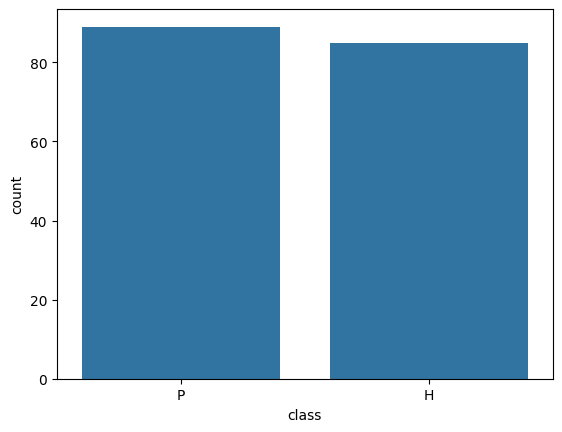

In [6]:
plt.figure()
sns.countplot(x="class",data=df)

In [8]:
null=pd.DataFrame(df.isna().sum())
sum(null)

0

In [11]:
y=df["class"]
x=df.drop(["class","ID"],axis = 1)
x.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2)

were passing the datasets of x train and y train and in prediction were using the datasets of x test

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


now we check the accurancy of y test with the lr prediction and if the accuracy is above 80

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(Y_test,lr_pred))
confusion_matrix(Y_test,lr_pred)

0.9142857142857143


array([[14,  1],
       [ 2, 18]])

In [18]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)
sv_pred=sv.predict(X_test)

In [19]:
accuracy_score(Y_test,sv_pred)

0.6

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

In [22]:
accuracy_score(Y_test,rf_pred)


0.8571428571428571

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

In [24]:
accuracy_score(Y_test,dt_pred)

0.9142857142857143